# Multiple Disease Prediction

## LIVER DISEASE

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Data
liver_data = pd.read_csv('indian_liver_patient.csv')
liver_data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver_data.shape

(583, 11)

In [6]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
# checking for missing values in each column
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# EDA

In [8]:
# statistical measures about the data
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
#filling mean value

liver_data['Albumin_and_Globulin_Ratio'] = liver_data['Albumin_and_Globulin_Ratio'].fillna(0.947064)

In [10]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

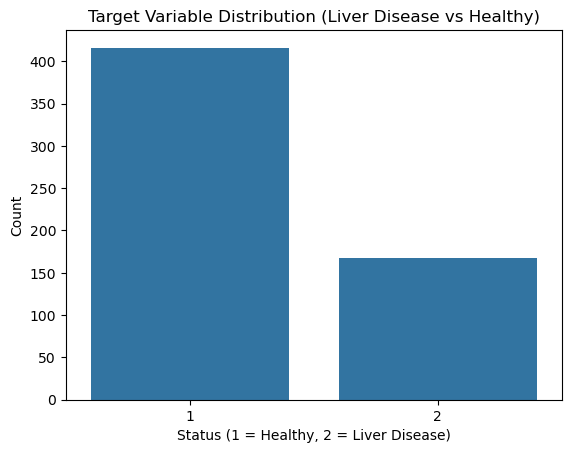

In [11]:
# Target variable distribution (status)

import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure()
sns.countplot(x ='Dataset', data=liver_data)
plt.title("Target Variable Distribution (Liver Disease vs Healthy)")
plt.xlabel("Status (1 = Healthy, 2 = Liver Disease)")
plt.ylabel("Count")
plt.show()


In [12]:
liver_data['Dataset'] = liver_data['Dataset'].replace([1,2],[0,1])
liver_data['Dataset'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

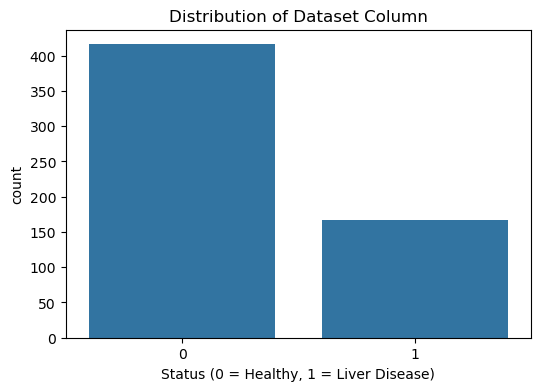

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dataset', data=liver_data)
plt.title("Distribution of Dataset Column")
plt.xlabel("Status (0 = Healthy, 1 = Liver Disease)")
plt.show()

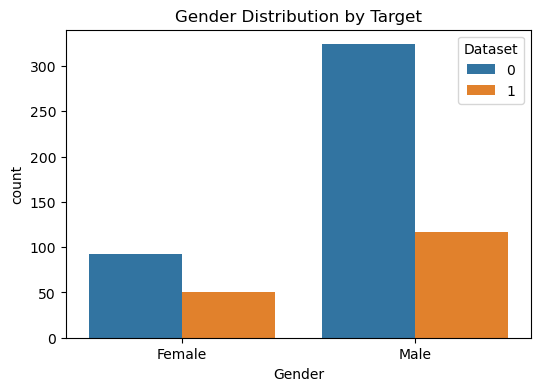

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Dataset', data=liver_data)
plt.title("Gender Distribution by Target")
plt.show()


In [15]:
liver_data['Gender'] = liver_data['Gender'].replace(['Female','Male'], [1,0])

In [16]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,0


<Axes: >

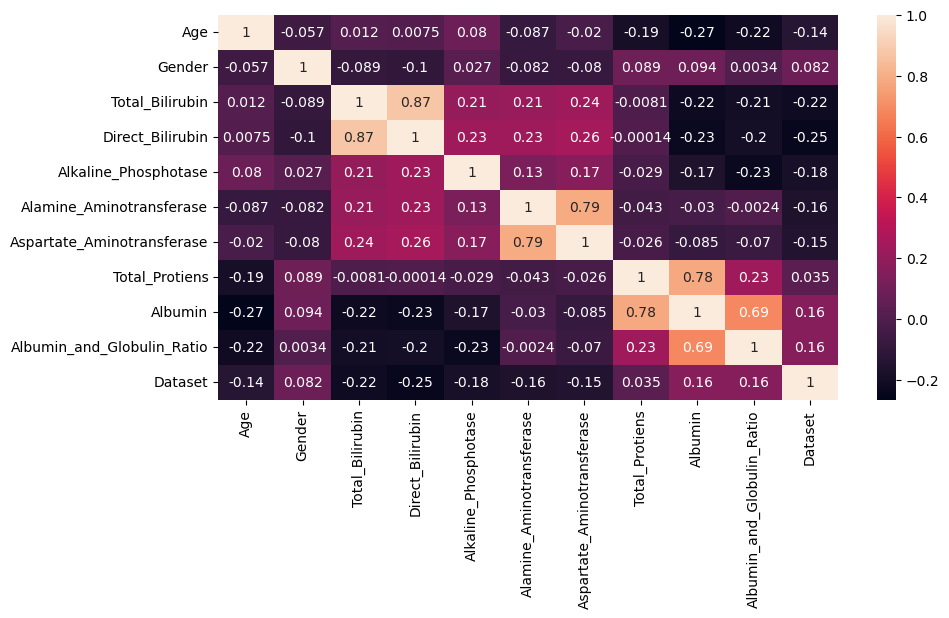

In [17]:
plt.figure(figsize = (10,5))
sns.heatmap(liver_data.corr(), annot = True)

In [18]:
# Feature & Target

x = liver_data.drop('Dataset', axis=1)
y = liver_data['Dataset']

In [19]:
x.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64

## Train-test split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

## Scaling

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [23]:
# List all numeric features
numeric_features = x.columns.tolist()

In [24]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

## Model Training

In [25]:
!pip install xgboost -q

In [27]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [28]:
pipelines = {
    "Logistic Regression": Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=500))
    ]),
    
    "KNeighborsClassifier": Pipeline([
         ('preprocess', preprocessor),  
         ('smote', SMOTE(random_state=42)),
         ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    
    "Decision Tree": Pipeline([
       ('preprocess', preprocessor),  
        ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
    ]),
    
    "Random Forest": Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(random_state=42,n_estimators=300,class_weight='balanced'))
    ]),
    
    "GradientBoostingClassifier": Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', GradientBoostingClassifier(n_estimators=200, random_state=42))
    ]),
    
    "XGBoost": Pipeline([
        ('preprocess', preprocessor),
        ('model', XGBClassifier(use_label_encoder=False,
        eval_metric='logloss',
        random_state=42))
    ])

}

In [29]:
# Logistic Regression
logreg_pipeline = pipelines["Logistic Regression"]
logreg_pipeline.fit(x_train, y_train)

# KNeighborsClassifier
knn_pipeline = pipelines["KNeighborsClassifier"]
knn_pipeline.fit(x_train, y_train)

# Decision Tree
dt_pipeline = pipelines["Decision Tree"]
dt_pipeline.fit(x_train, y_train)

# Random Forest
rf_pipeline = pipelines["Random Forest"]
rf_pipeline.fit(x_train, y_train)

# Random Forest
gb_pipeline = pipelines["GradientBoostingClassifier"]
gb_pipeline.fit(x_train, y_train)

# XGBoost
xgb1_pipeline = pipelines["XGBoost"]
xgb1_pipeline.fit(x_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [31]:
for name, pipe in pipelines.items():
    # Fit
    pipe.fit(x_train, y_train)
    
    # Predict
    y_pred = pipe.predict(x_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n--- {name} ---")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.6779661016949152
F1 Score: 0.7019314150571542
              precision    recall  f1-score   support

           0       0.93      0.62      0.75        45
           1       0.41      0.86      0.56        14

    accuracy                           0.68        59
   macro avg       0.67      0.74      0.65        59
weighted avg       0.81      0.68      0.70        59


--- KNeighborsClassifier ---
Accuracy: 0.5423728813559322
F1 Score: 0.5755282098908753
              precision    recall  f1-score   support

           0       0.82      0.51      0.63        45
           1       0.29      0.64      0.40        14

    accuracy                           0.54        59
   macro avg       0.56      0.58      0.52        59
weighted avg       0.70      0.54      0.58        59


--- Decision Tree ---
Accuracy: 0.711864406779661
F1 Score: 0.7252182845403184
              precision    recall  f1-score   support

           0       0.85      0.76   

XGBoost ROC-AUC Score: 0.8809523809523809


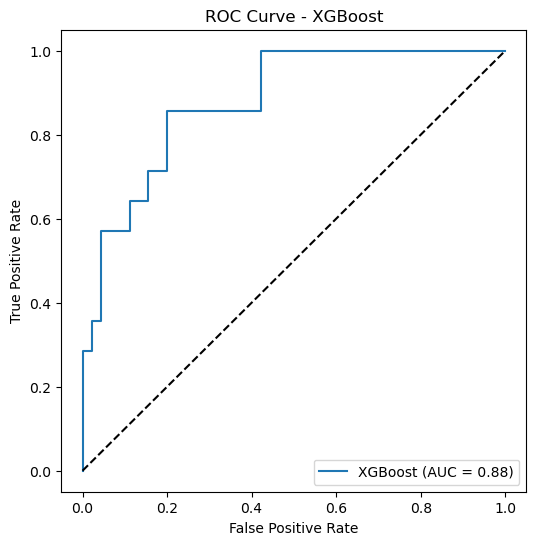

In [32]:
# ROC-AUC comparison

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = xgb1_pipeline.predict_proba(x_test)[:, 1]  # probability for positive class

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("XGBoost ROC-AUC Score:", roc_auc)

#plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

## Confusion Matrix

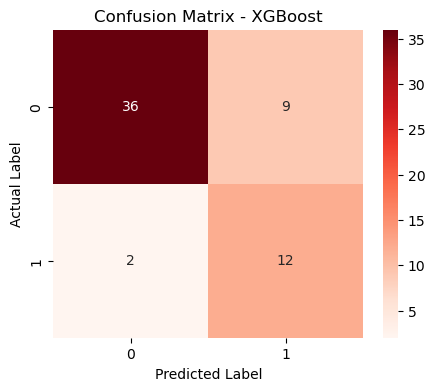

In [33]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_prob = xgb1_pipeline.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_prob)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

## Pickle file

In [34]:
import pickle

# Save the pipeline
with open("xgb1_pipeline.pkl", "wb") as f:
    pickle.dump(xgb1_pipeline, f)

print("XGBoost pipeline saved successfully!")

XGBoost pipeline saved successfully!
